In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [7]:
df_exploaded = df.explode('job_skills')
skill_stats = df_exploaded.groupby('job_skills').agg(
  skill_count = ('job_skills', 'count'),
  median_salary = ('salary_year_avg', 'median'),
)
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


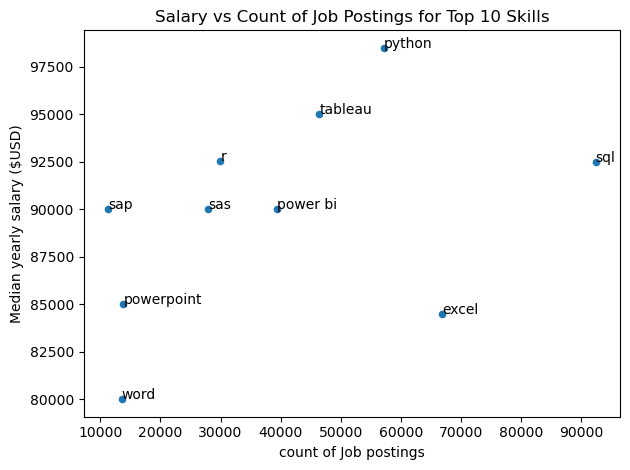

In [4]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('count of Job postings')
plt.ylabel('Median yearly salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')

for i, txt in enumerate(skill_stats.index):
  plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196075 entries, 1 to 785737
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        196075 non-null  object        
 1   job_title              196075 non-null  object        
 2   job_location           195801 non-null  object        
 3   job_via                196067 non-null  object        
 4   job_schedule_type      191475 non-null  object        
 5   job_work_from_home     196075 non-null  bool          
 6   search_location        196075 non-null  object        
 7   job_posted_date        196075 non-null  datetime64[ns]
 8   job_no_degree_mention  196075 non-null  bool          
 9   job_health_insurance   196075 non-null  bool          
 10  job_country            196067 non-null  object        
 11  salary_rate            9746 non-null    object        
 12  salary_year_avg        5451 non-null    float64  

In [6]:
df_DE = df[df['job']]

KeyError: 'job'